# D5 Recreating  W E B Du Bois Visualisation
---
### Thirty days of Data Visualisations
JWriggy

Inspired by a [challenge](https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge) to recreate some of Du Bois's classic visualisations.

Connected stacked horizontal bars.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('db.mplstyle')

In [2]:
# The Data
df = pd.read_csv('data/Dubois5.csv', index_col=['Class','Actual Average'])
df

,,Rent,Food,Clothes,Tax,Other
Class,Actual Average,,,,,
$100-200,139.10,19,43,28,9.9,NaN
$200-300,249.45,22,47,23,4.0,4.0
$300-400,335.66,23,43,18,4.5,11.5
$400-500,433.82,18,37,15,5.5,24.5
$500-750,547.00,13,31,17,5.0,34.0
$750-1000,880.00,0,37,19,8.0,36.0
Over $1000,1125.00,0,29,16,4.5,50.5


In [3]:
df = df.fillna(0)
# calculate cumulative sum by row
dfCum = df.cumsum(axis=1)

# text
title = 'INCOME AND EXPENDITURE OF 150 NEGRO FAMILIES IN ATLANTA, GA., USA'
splits = df.columns
legendText = [s.upper() for s in splits]

# bar labels
catTitle1= df.index.names[0].upper()
catTitle2= df.index.names[1].upper()
cat1Labels = [v.upper() for v in df.index.get_level_values(0).values]
cat2Labels = ['$'+str(v) for v in df.index.get_level_values(1).values]

# ylocs for bars
Ys = range(7,0,-1)

# style
colors = ['#000000','#6666cc','#ffc0cb','#b6e2f4','#cceecc'] 
h2 = {'fontsize': 10, 'alpha': 0.6,  'ha':'left', 'va':'center'}

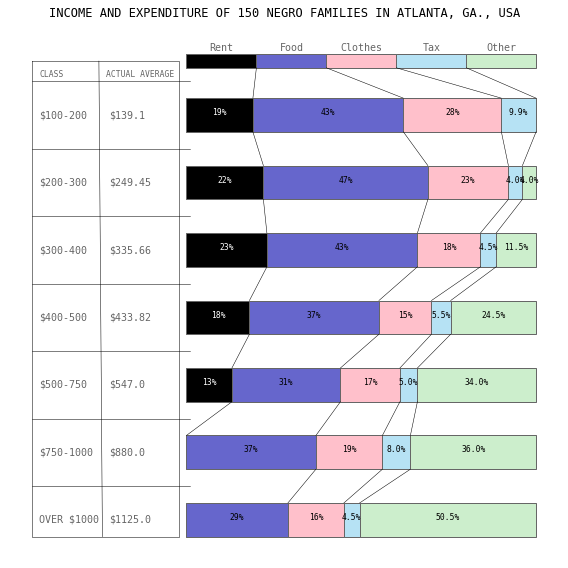

In [4]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_frame_on(False)
ax.tick_params(labelleft=False,labelbottom=False )

# plot bars
for i, (split, c) in enumerate(zip(splits, colors)):
    ax.text(20*i+10, len(Ys)+1,split, fontdict=h2, ha='center')
    ax.barh(len(Ys)+.8, 20, 0.2, 20*i, label=split, color=c, edgecolor='#666666')
    widths = df[split]
    starts = dfCum[split] - widths
    ax.barh(Ys, widths, 0.5, left=starts, label=split, color=c, edgecolor='#666666')
    # annotate
    for (x,y,w) in zip(starts + widths/2,Ys, widths):
        if w>1 :
            if (c=='#000000'): txtc = 'w'
            else : txtc = 'k'
            ax.text(x, y, str(w)+'%', fontsize=8, ha='center',color=txtc)
# annotation
for i,xx in enumerate((dfCum.iloc[0])[:-1].values):
    ax.plot([(i+1)*20, xx],[len(Ys)+.7,len(Ys)+.25], lw=.5, color='k')
for j in range(1,len(df)):
    for x1,x2 in zip((dfCum.iloc[j-1])[:-1].values, (dfCum.iloc[j])[:-1].values):
        if x1>0 :
            ax.plot([x1, x2],[len(Ys)+.75-j,len(Ys)-j+.25], lw=.5, color='k')

# category labels annotation
x = -42
y1, y2 = Ys[0]+.8,Ys[-1]-.25
ax.plot([x-2, -2,-2,x-2,x-2],[y1,y1,y2,y2,y1],lw=.5,color='k')
ax.plot([x+17,x+18],[y1,y2],lw=.5,color='k') 
ax.text(x,y1-.2, catTitle1, fontdict=h2, fontsize=8)
ax.text(x+19,y1-.2, catTitle2, fontdict=h2, fontsize=8)
for y,cat1, cat2 in zip(Ys,cat1Labels, cat2Labels):
    ax.text(x,y, cat1, fontdict=h2)
    ax.text(x+20,y,cat2, fontdict=h2)
    ax.plot([x-2,1],[y+.5, y+.5],lw=.5,color='k')
    
fig.suptitle(title, fontsize=12, ha='center')
plt.tight_layout()
plt.savefig("vis/D5_duBois5.png")
plt.show()